# Processing Data from .mat file created

Imports:

In [1]:
import numpy as np 
import scipy.io as sio
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Processing .mat:

In [2]:
# Turn .mat file into dictionary
def add_todict(matobj):
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sio.matlab.mio5_params.mat_struct):
            dict[strg] = add_todict(elem)
        else:
            dict[strg] = elem
    return dict

def convert_to_dictonary(dict):
    for key in dict:
        if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
            dict[key] = add_todict(dict[key])
    return dict

data = sio.loadmat('burgers_data.mat', struct_as_record=False, squeeze_me=True)
data_dict = convert_to_dictonary(data)

print("u shape:", np.shape(data_dict['u']))
print("x shape:", np.shape(data_dict['x']))
print("t shape:", np.shape(data_dict['t']))

u shape: (101, 201)
x shape: (101,)
t shape: (201,)


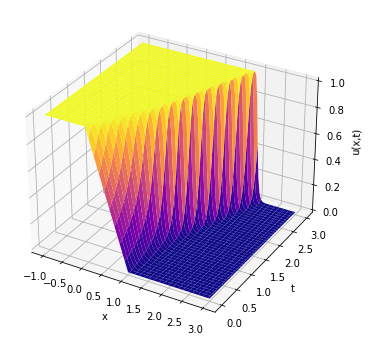

In [3]:
# Plotting Data as a test 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

X, T = np.meshgrid(data_dict['x'], data_dict['t'])
U = data_dict['u'] 

ax.plot_surface(X, T, U.T, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
plt.show()

In [5]:
# Movable Solution 
camera = dict(
    up=dict(x=1, y=1, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.7, y=1.7, z=0.25)
)
fig = go.Figure(data=[go.Surface(z=U.T, x=X, y=T)])
fig.update_layout(title='u(x,t) solution', autosize=False,
                  width=650, height=450, scene_camera=camera, 
                  scene = dict(
                    xaxis_title='x',
                    yaxis_title='t',
                    zaxis_title='u(x,t)'))
fig.show()